# Extreme Weather Data Analysis Practice Project

## SQL Practice

Source: https://www.linkedin.com/posts/mary-knoeferl_extreme-weather-data-analysis-project-mknoeferl-activity-7371233708634419200-gv5c?utm_source=share&utm_medium=member_desktop&rcm=ACoAAAvEfcEBGoC1T5quuEpkCHJA9lb82uz-6iw

The database for this project can be found here: https://lnkd.in/gkxiUeMs 

In [2]:
# ================================
# 📦 Setup
# ================================
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Koneksi ke database
db_file = "Weather.db"
conn = sqlite3.connect(db_file)


### Q1 - Total jumlah hari data

In [3]:
query = "SELECT COUNT(*) AS total_days FROM daily_weather;"
df_days = pd.read_sql(query, conn)
df_days


,total_days
0,370


#### Insight
Total terdapat observasi cuaca dari 370 hari.

### Q2 - Suhu maksimum tertinggi & tanggal

In [4]:
query = """
SELECT date, tmax_f AS max_temp
FROM daily_weather
ORDER BY tmax_f DESC
LIMIT 1;
"""
df_max = pd.read_sql(query, conn)
df_max


,date,max_temp
0,2023-01-22,109.0


In [5]:
query = """
SELECT 
    date AS "Date",
    tmax_f || ' °F' AS "Max Temperature (°F)",
    ROUND((tmax_f - 32) * 5.0/9.0, 1) || ' °C' AS "Max Temperature (°C)"
FROM daily_weather
ORDER BY tmax_f DESC
LIMIT 1;
"""
df_max = pd.read_sql(query, conn)
df_max


,Date,Max Temperature (°F),Max Temperature (°C)
0,2023-01-22,109.0 °F,42.8 °C


#### Insight
Suhu maksimum tertinggi adalah 109.0 °F (42.8 °C) pada tanggal 22 Januari 2023 (2023-01-22).

### Q3 - Suhu minimum terendah & tanggal

In [6]:
query = """
SELECT 
    date AS "Date",
    tmin_f || ' °F' AS "Min Temperature (°F)",
    ROUND((tmin_f - 32) * 5.0/9.0, 1) || ' °C' AS "Min Temperature (°C)"
FROM daily_weather
ORDER BY tmin_f ASC
LIMIT 1;
"""

df_min = pd.read_sql(query, conn)
df_min



,Date,Min Temperature (°F),Min Temperature (°C)
0,2023-05-09,-88.0 °F,-66.7 °C


#### Insight
Suhu minimum terendah adalah -88.0 °F (-66.7 °C) pada tanggal 9 Mei 2023 (2023-05-09).

### Q4 - Extreme Heat Days (>90 °F) per Year

In [7]:
query = """
SELECT 
    strftime('%Y', date) AS "Year",
    COUNT(*) AS "Extreme Heat Days (>90 °F)"
FROM daily_weather
WHERE tmax_f > 90
GROUP BY "Year"
ORDER BY "Year";
"""
df_heat_sql = pd.read_sql(query, conn)
df_heat_sql

,Year,Extreme Heat Days (>90 °F)
0,2023,28


#### Insight
Jumlah hari dengan panas ekstrim - temperatur diatas 90 °F (32.22 °C) tercatat sebanyak 28  hari pada tahun 2023.

### Q5 – Extreme Cold Days (<32 °F) per Year

In [8]:
query = """
SELECT 
    strftime('%Y', date) AS "Year",
    COUNT(*) AS "Extreme Cold Days (<32 °F)"
FROM daily_weather
WHERE tmin_f < 32
GROUP BY "Year"
ORDER BY "Year";
"""
df_cold = pd.read_sql(query, conn)
df_cold


,Year,Extreme Cold Days (<32 °F)
0,2023,211


#### Insight
Jumlah hari dengan dingin ekstrim - temperatur dibawah 32 °F (0 °C) tercatat sebanyak 211 hari pada tahun 2023.

In [9]:
query = """
SELECT 
    strftime('%Y', date) AS "Year",
    SUM(CASE WHEN tmax_f > 90 THEN 1 ELSE 0 END) AS "Extreme Heat Days (>90 °F)",
    SUM(CASE WHEN tmin_f < 32 THEN 1 ELSE 0 END) AS "Extreme Cold Days (<32 °F)"
FROM daily_weather
GROUP BY "Year"
ORDER BY "Year";
"""
df_heat_cold_sql = pd.read_sql(query, conn)
df_heat_cold_sql


,Year,Extreme Heat Days (>90 °F),Extreme Cold Days (<32 °F)
0,2023,28,211


### Q6 – Average Wind Speed per Year

In [10]:
query = """
SELECT 
    strftime('%Y', date) AS "Year",
    ROUND(AVG(wspd_mph), 2) || ' mph' AS "Avg Wind Speed (mph)"
FROM daily_weather
GROUP BY "Year"
ORDER BY "Year";
"""
df_wind = pd.read_sql(query, conn)
df_wind


,Year,Avg Wind Speed (mph)
0,2023,5.15 mph


#### Insight
Rata-rata kecepatan angin dalam mph (miles per hour) tahun 2023 adalah 5.15 mph.

### Q7 – Days with Wind > 20 mph

In [11]:
query = """
SELECT 
    COUNT(*) AS "Days with Wind >20 mph"
FROM daily_weather
WHERE wspd_mph > 20;
"""
df_high_wind = pd.read_sql(query, conn)
df_high_wind


,Days with Wind >20 mph
0,105


#### Extreme Heat (>90 °F), Cold (<32 °F) & Windy Days (> 20 mph) per Month - SQL

In [12]:
query = """
SELECT
    strftime('%Y-%m', date) AS year_month,
    COUNT(CASE WHEN tmax_f > 90 THEN 1 END) AS extreme_heat_days,
    COUNT(CASE WHEN tmin_f < 32 THEN 1 END) AS extreme_cold_days,
    COUNT(CASE WHEN wspd_mph > 20 THEN 1 END) AS extreme_windy_days
FROM daily_weather
GROUP BY year_month
ORDER BY year_month;
"""
df_heat_cold_windy_month_sql = pd.read_sql(query, conn) 
df_heat_cold_windy_month_sql

,year_month,extreme_heat_days,extreme_cold_days,extreme_windy_days
0,2023-01,4,13,7
1,2023-02,1,13,8
2,2023-03,2,17,11
3,2023-04,2,18,7
4,2023-05,3,20,8
5,2023-06,1,16,10
6,2023-07,6,18,10
7,2023-08,2,17,5
8,2023-09,2,20,8
9,2023-10,4,23,9


#### Insight
Jumlah hari dengan kecepatan angin di atas 20 mph (miles per hour) tahun 2023 adalah 105 hari.

### Q8 – Extreme Weather Days per Year

In [13]:
query = """
SELECT 
    strftime('%Y', date) AS "Year",
    COUNT(*) AS "Extreme Weather Days"
FROM daily_weather
WHERE tmax_f > 90 OR tmin_f < 32 OR wspd_mph > 20
GROUP BY "Year"
ORDER BY "Year";
"""
df_extreme = pd.read_sql(query, conn)
df_extreme


,Year,Extreme Weather Days
0,2023,265


#### Insight
Jumlah hari dengan cuaca ekstrim tahun 2023 adalah 265 hari.  
**Kriteria cuaca ekstrim:**
1. Temperatur diatas 90 °F (32.22 °C)
2. Temperatur dibawah 32 °F (0 °C)
3. Kecepatan angin di atas 20 mph (miles per hour)

### Q9 – Month with Highest Extreme Weather Days

In [14]:
query = """
SELECT 
    strftime('%Y-%m', date) AS "Year-Month",
    COUNT(*) AS "Extreme Weather Days"
FROM daily_weather
WHERE tmax_f > 90 OR tmin_f < 32 OR wspd_mph > 20
GROUP BY "Year-Month"
ORDER BY "Extreme Weather Days" DESC
LIMIT 1;
"""
df_extreme_month = pd.read_sql(query, conn)
df_extreme_month


,Year-Month,Extreme Weather Days
0,2023-10,28


#### Insight
Bulan dengan cuaca paling ekstrim tahun 2023 adalah bulan **Oktober** dengan **28 hari** terjadi cuaca ekstrim.  
**Kriteria cuaca ekstrim:**
1. Temperatur diatas 90 °F (32.22 °C)
2. Temperatur dibawah 32 °F (0 °C)
3. Kecepatan angin di atas 20 mph (miles per hour)

### Q10 – Percentage of Extreme Weather Days

In [15]:
query = """
WITH total_days AS (
    SELECT COUNT(*) AS total FROM daily_weather
),
extreme_days AS (
    SELECT COUNT(*) AS extreme
    FROM daily_weather
    WHERE tmax_f > 90 OR tmin_f < 32 OR wspd_mph > 20
)
SELECT 
    total AS "Total Days",
    extreme AS "Extreme Weather Days",
    ROUND(100.0 * extreme / total, 2) || '%' AS "Extreme Days (%)"
FROM total_days, extreme_days;
"""
df_extreme_pct = pd.read_sql(query, conn)
df_extreme_pct


,Total Days,Extreme Weather Days,Extreme Days (%)
0,370,265,71.62%


#### Insight
Persentase jumlah hari dengan cuaca ekstrim tahun 2023 adalah **71,62%** dengan **265 hari** terjadi cuaca ekstrim dari total **370 hari** pengamatan.  
**Kriteria cuaca ekstrim:**
1. Temperatur diatas 90 °F (32.22 °C)
2. Temperatur dibawah 32 °F (0 °C)
3. Kecepatan angin di atas 20 mph (miles per hour)

## Visualisasi with PANDAS

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import datetime as dt

sns.set(style="whitegrid")

In [17]:
#Cek nama tables dalam database

db_file = "Weather.db"  # Path 

try:
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Execute a query to get the list of tables
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()

    if tables:
        print(f"Tabel-tabel dalam database '{db_file}':")
        for table in tables:
            print(table[0])  # Print the table name
    else:
        print(f"Tidak ada tabel yang ditemukan dalam database '{db_file}'.")

except sqlite3.Error as e:
    print(f"Terjadi kesalahan database: {e}")

finally:
    if conn:
        conn.close()
        print("Koneksi database ditutup.")

Tabel-tabel dalam database 'Weather.db':
stations
sqlite_sequence
daily_weather
thresholds
Koneksi database ditutup.


In [18]:
# Database path untuk koneksi di jupyter notebook
db_file = "Weather.db"  # Path 

# Connect to Database and Load Data
conn = None  # Initialize conn outside the try block
try:
    conn = sqlite3.connect(db_file)
    
    # Load DataFrames
    stations = pd.read_sql("SELECT * FROM stations", conn)
    sqlite_sequence = pd.read_sql("SELECT * FROM sqlite_sequence", conn)
    daily_weather = pd.read_sql("SELECT * FROM daily_weather", conn)
    thresholds = pd.read_sql("SELECT * FROM thresholds", conn)

    print("Datasets loaded successfully!")

except sqlite3.Error as e:
    print(f"Database error: {e}")

finally:
    if conn:
        conn.close()
        print("Database connection closed.")

Datasets loaded successfully!
Database connection closed.


In [19]:
display(stations)
stations.info()

,station_id,name,latitude,longitude,elevation
0,1,Sample Station,40.7128,-74.006,10.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  1 non-null      int64  
 1   name        1 non-null      object 
 2   latitude    1 non-null      float64
 3   longitude   1 non-null      float64
 4   elevation   1 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 172.0+ bytes


In [20]:
display(daily_weather.sample(2))
daily_weather.info()

,weather_id,station_id,date,tmax_f,tmin_f,wspd_mph,precipitation_in
9,10,1,2023-01-05,-40.0,33.0,-12.0,-0.7
27,28,1,2023-01-23,-8.0,98.0,18.0,-0.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   weather_id        370 non-null    int64  
 1   station_id        370 non-null    int64  
 2   date              370 non-null    object 
 3   tmax_f            370 non-null    float64
 4   tmin_f            370 non-null    float64
 5   wspd_mph          370 non-null    float64
 6   precipitation_in  370 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 20.4+ KB


In [21]:
thresholds

,threshold_id,name,variable,operator,value,unit
0,1,Hot Day,tmax_f,>,90.0,°F
1,2,Cold Day,tmin_f,<,32.0,°F
2,3,Windy Day,wspd_mph,>,20.0,mph


In [24]:
daily_weather

,weather_id,station_id,date,tmax_f,tmin_f,wspd_mph,precipitation_in
0,1,1,2023-07-01,95.2,75.1,12.0,0.00
1,2,1,2023-07-02,88.5,70.3,8.5,0.10
2,3,1,2023-07-03,92.0,71.0,21.3,0.00
3,4,1,2023-07-04,85.6,65.2,15.8,0.00
4,5,1,2023-07-05,97.1,77.0,10.2,0.05
...,...,...,...,...,...,...,...
365,366,1,2023-12-27,-31.0,0.0,16.0,-0.75
366,367,1,2023-12-28,28.0,17.0,37.0,0.75
367,368,1,2023-12-29,-36.0,29.0,-18.0,0.05
368,369,1,2023-12-30,-28.0,-39.0,32.0,0.45


#### Extreme Heat (>90 °F), Cold (<32 °F) & Windy Days (> 20 mph) per Month - PANDAS

In [34]:
# VISUALISASI Extreme Heat Days (>90 °F) & Extreme Cold Days (<32 °F) per Year 

# pastikan kolom date sudah datetime
daily_weather["date"] = pd.to_datetime(daily_weather["date"], errors="coerce")

# lalu buat kolom year_month
daily_weather["year_month"] = daily_weather["date"].dt.to_period("M")

# agregasi
df_heat_cold_windy_month = (
    daily_weather.groupby("year_month")
    .agg(
        extreme_heat_days=("tmax_f", lambda x: (x > 90).sum()),
        extreme_cold_days=("tmin_f", lambda x: (x < 32).sum()),
        extreme_windy_days=("wspd_mph", lambda x: (x > 20).sum())
    )
    .reset_index()
)

# ubah kembali period jadi string (opsional untuk plotting)
df_heat_cold_windy_month["year_month"] = df_heat_cold_windy_month["year_month"].astype(str)

df_heat_cold_windy_month.head()


,year_month,extreme_heat_days,extreme_cold_days,extreme_windy_days
0,2023-01,4,13,7
1,2023-02,1,13,8
2,2023-03,2,17,11
3,2023-04,2,18,7
4,2023-05,3,20,8


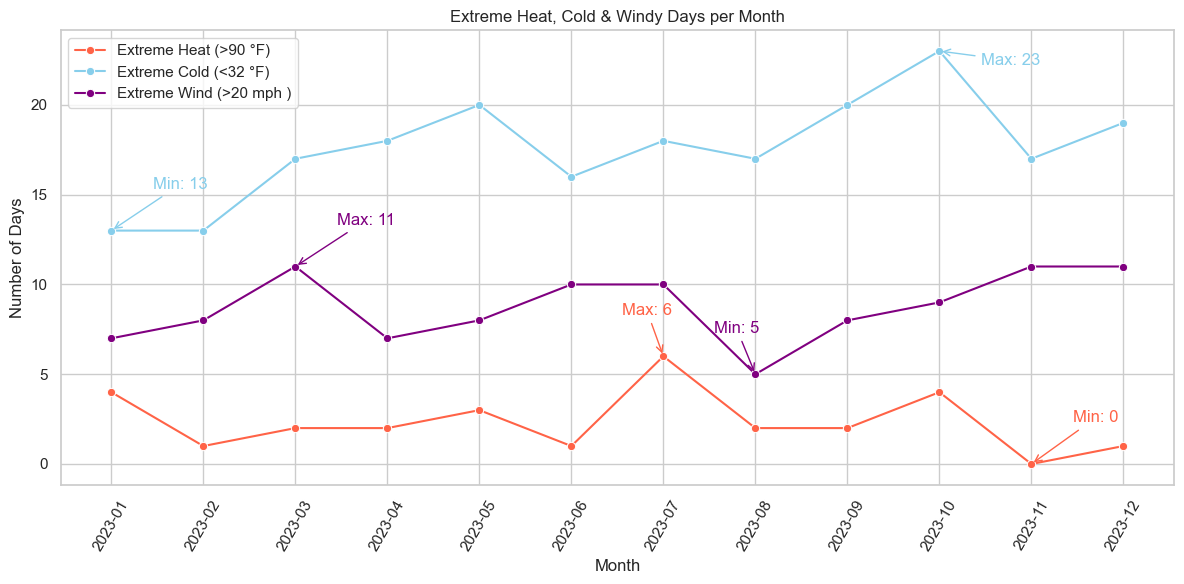

In [53]:
plt.figure(figsize=(12,6))
ax = plt.gca()

# Plot garis Extreme Heat
sns.lineplot(
    data=df_heat_cold_windy_month,
    x="year_month", y="extreme_heat_days",
    marker="o", label="Extreme Heat (>90 °F)", color="tomato", ax=ax
)

# Plot garis Extreme Cold
sns.lineplot(
    data=df_heat_cold_windy_month,
    x="year_month", y="extreme_cold_days",
    marker="o", label="Extreme Cold (<32 °F)", color="skyblue", ax=ax
)

# Plot garis Extreme Wind
sns.lineplot(
    data=df_heat_cold_windy_month,
    x="year_month", y="extreme_windy_days",
    marker="o", label="Extreme Wind (>20 mph )", color="purple", ax=ax
)
# Cari index nilai min & max
heat_min_idx = df_heat_cold_windy_month["extreme_heat_days"].idxmin()
heat_max_idx = df_heat_cold_windy_month["extreme_heat_days"].idxmax()
cold_min_idx = df_heat_cold_windy_month["extreme_cold_days"].idxmin()
cold_max_idx = df_heat_cold_windy_month["extreme_cold_days"].idxmax()
wind_min_idx = df_heat_cold_windy_month["extreme_windy_days"].idxmin()
wind_max_idx = df_heat_cold_windy_month["extreme_windy_days"].idxmax()

# Annotate Extreme Heat
ax.annotate(
    f"Min: {df_heat_cold_windy_month.loc[heat_min_idx, 'extreme_heat_days']}",
    xy=(df_heat_cold_windy_month.loc[heat_min_idx, "year_month"], df_heat_cold_windy_month.loc[heat_min_idx, "extreme_heat_days"]),
    xytext=(30, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color="tomato"),
    color="tomato"
)

ax.annotate(
    f"Max: {df_heat_cold_windy_month.loc[heat_max_idx, 'extreme_heat_days']}",
    xy=(df_heat_cold_windy_month.loc[heat_max_idx, "year_month"], df_heat_cold_windy_month.loc[heat_max_idx, "extreme_heat_days"]),
    xytext=(-30, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color="tomato"),
    color="tomato"
)

# Annotate Extreme Cold
ax.annotate(
    f"Min: {df_heat_cold_windy_month.loc[cold_min_idx, 'extreme_cold_days']}",
    xy=(df_heat_cold_windy_month.loc[cold_min_idx, "year_month"], df_heat_cold_windy_month.loc[cold_min_idx, "extreme_cold_days"]),
    xytext=(30, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color="skyblue"),
    color="skyblue"
)

ax.annotate(
    f"Max: {df_heat_cold_windy_month.loc[cold_max_idx, 'extreme_cold_days']}",
    xy=(df_heat_cold_windy_month.loc[cold_max_idx, "year_month"], df_heat_cold_windy_month.loc[cold_max_idx, "extreme_cold_days"]),
    xytext=(30, -10), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color="skyblue"),
    color="skyblue"
)

# Annotate Extreme Wind
ax.annotate(
    f"Min: {df_heat_cold_windy_month.loc[wind_min_idx, 'extreme_windy_days']}",
    xy=(df_heat_cold_windy_month.loc[wind_min_idx, "year_month"], df_heat_cold_windy_month.loc[wind_min_idx, "extreme_windy_days"]),
    xytext=(-30, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color="purple"),
    color="purple"
)

ax.annotate(
    f"Max: {df_heat_cold_windy_month.loc[wind_max_idx, 'extreme_windy_days']}",
    xy=(df_heat_cold_windy_month.loc[wind_max_idx, "year_month"], df_heat_cold_windy_month.loc[wind_max_idx, "extreme_windy_days"]),
    xytext=(30, 30), textcoords='offset points',
    arrowprops=dict(arrowstyle="->", color="purple"),
    color="purple"
)

plt.title("Extreme Heat, Cold & Windy Days per Month")
plt.xticks(rotation=60)
plt.ylabel("Number of Days")
plt.xlabel("Month")
plt.legend()
plt.tight_layout()
plt.savefig('extreme_heat_cold_windy.png', dpi=300, bbox_inches="tight")
plt.show()

### 📊 Insight Interpretasi Chart Extreme Heat, Cold & Windy Days
Visualisasi ini menunjukkan:  
1. **Hari dingin ekstrem** (<32 °F (0 °C)) lebih sering terjadi dibanding hari panas ekstrem (>90 °F (32.22 °C)) dan hari berangin ekstrem (>20 mph). 
2. Jumlah **hari dingin ekstrem** meningkat tajam di akhir tahun (Oktober–Desember), dengan puncak pada November.  
3. **Hari panas ekstrem** hanya muncul di musim panas (Juli–Agustus) dengan jumlah yang relatif sedikit (≤ 6 hari/bulan).  
4. **Hari berangin ekstrem** banyak terjadi pada awal musim semi (Maret) dan musim dingin (Desember), menunjukkan adanya perbedaan suhu yang signifikan antar massa udara.  
5. Pola ini menggambarkan wilayah dengan **iklim empat musim**, dengan musim dingin yang lebih ekstrem dibandingkan musim panas. 

### 💡 Potensi Pemanfaatan Data Lanjutan
- **Perencanaan Energi**: Prediksi permintaan listrik untuk pemanas & pendingin udara.  
- **Industri Ritel**: Atur stok produk musiman (jaket, kipas angin) sesuai pola cuaca ekstrem.  
- **Peringatan Dini**: Bahan untuk warning cuaca berangin ekstrem.  
- **Perencanaan Infrastruktur**: Pertimbangan konstruksi & jaringan listrik.  
- **Aktivitas Luar Ruangan**: Panduan event, olahraga, atau pariwisata.